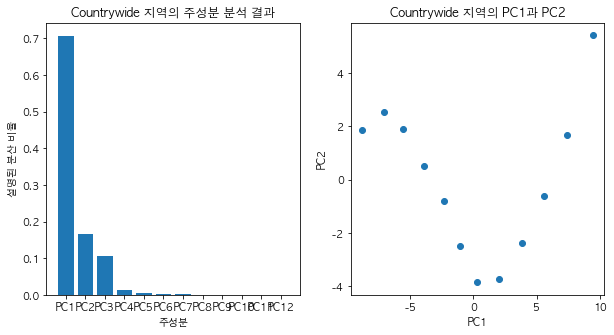

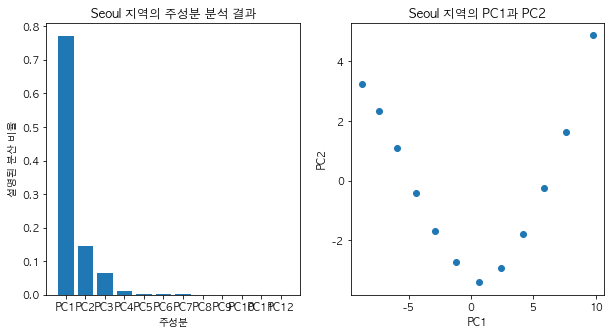

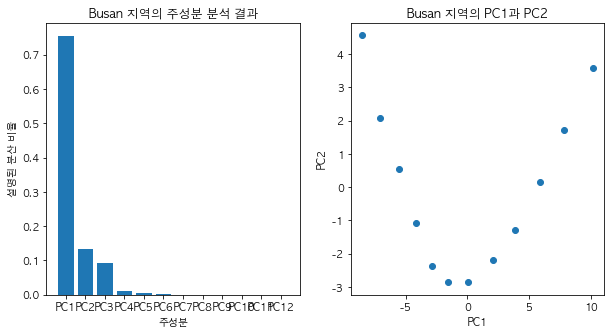

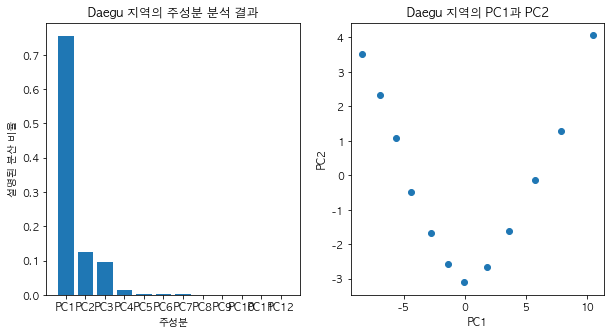

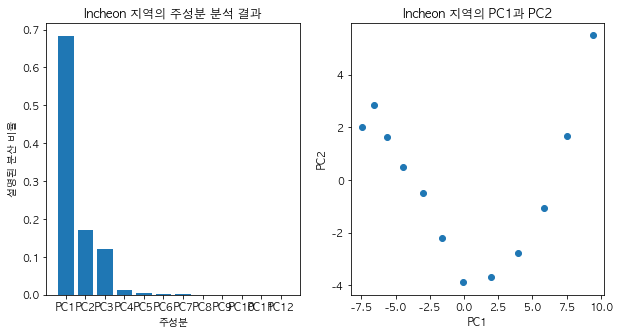

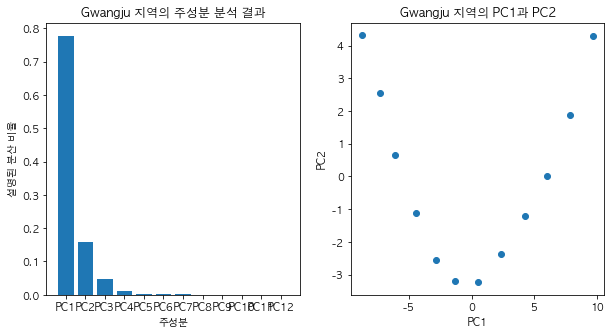

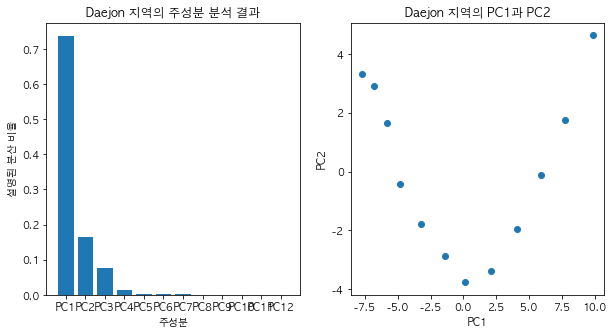

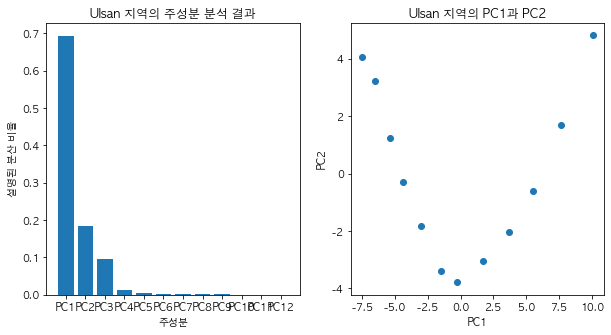

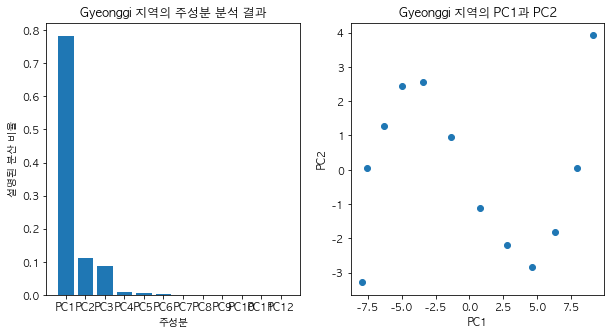

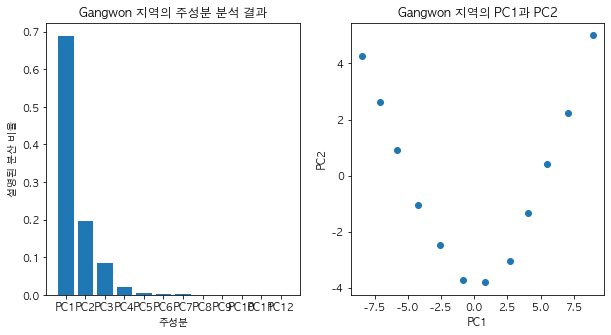

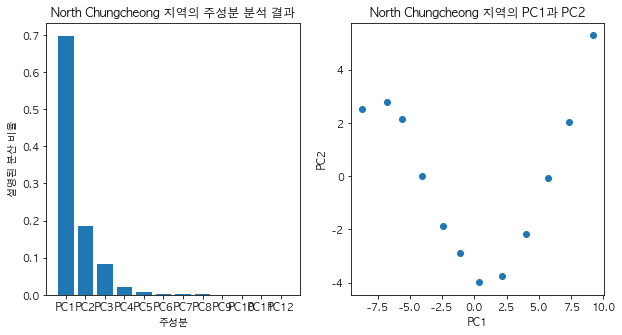

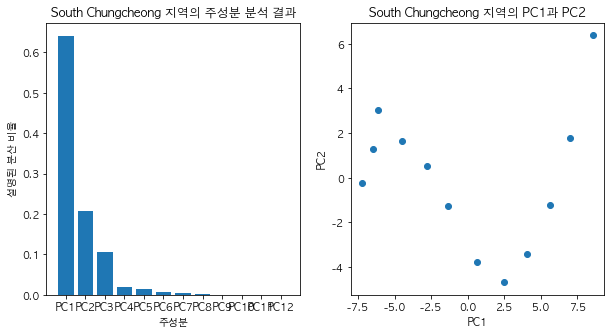

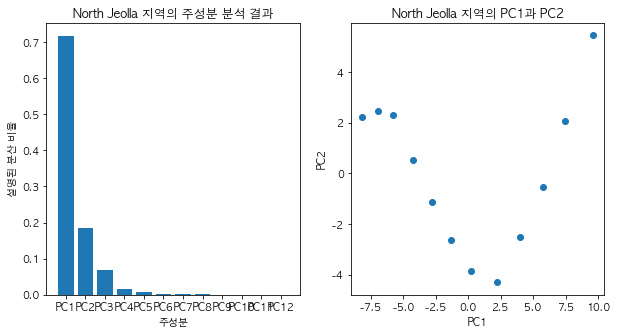

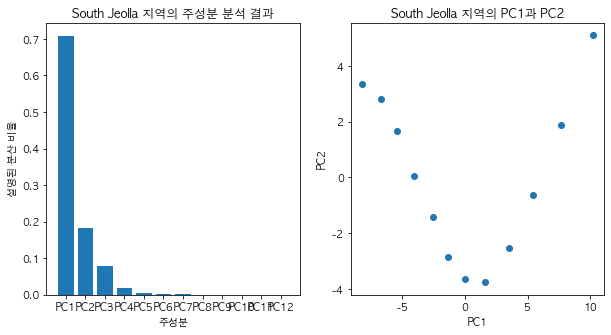

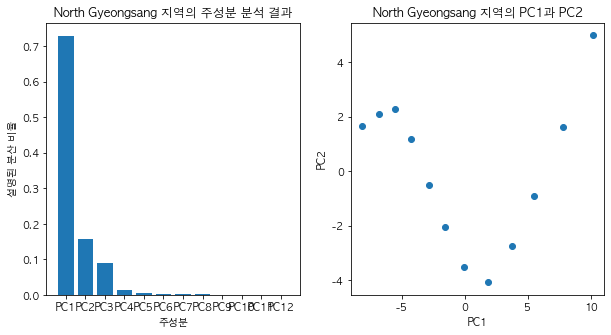

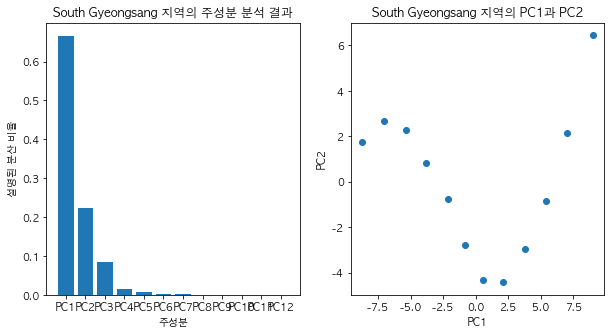

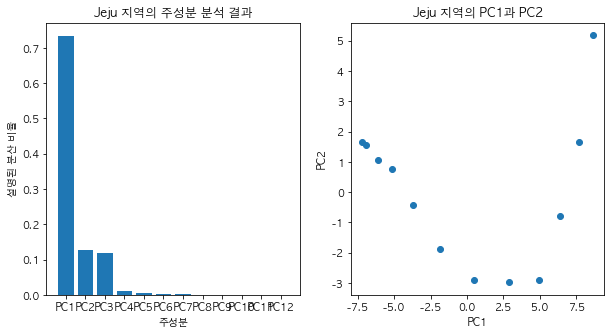

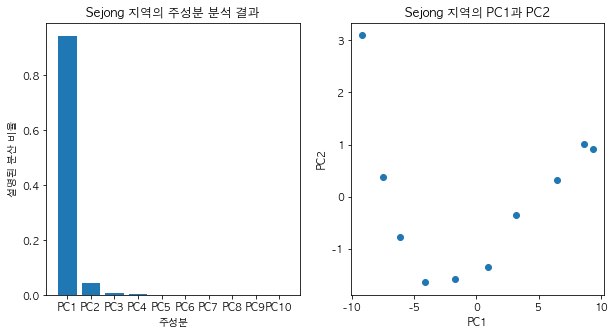

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib
matplotlib.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings("ignore")

# 데이터 로드
data = pd.read_csv("South_Korean_Age_Distribution.csv")

# 각 지역에 대해 스케일링된 데이터와 변환된 데이터를 저장할 딕셔너리 생성
region_data = {}

# 데이터에 있는 각 고유한 지역마다 반복
for region in data['region'].unique():
    
    # 현재 지역의 데이터만 선택
    region_subset = data.loc[data['region'] == region]
    
    # year 열을 인덱스로 설정
    region_subset = region_subset.set_index('year')
    
    # region 열 제거
    region_subset = region_subset.drop('region', axis=1)
    
    # 데이터 스케일링
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(region_subset)
    
    # PCA 적용
    pca = PCA()
    pca_data = pca.fit_transform(scaled_data)
    
    # 변환된 데이터를 딕셔너리에 저장
    region_data[region] = pca_data
    
    # 주성분 분석 결과를 막대 그래프로 나타냄
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax[0].bar(x=['PC{}'.format(i) for i in range(1, pca.n_components_+1)], 
           height=pca.explained_variance_ratio_)
    ax[0].set_title(f"{region} 지역의 주성분 분석 결과")
    ax[0].set_xlabel("주성분")
    ax[0].set_ylabel("설명된 분산 비율")
    
    # PC1과 PC2의 산점도를 그림
    ax[1].scatter(x=pca_data[:, 0], y=pca_data[:, 1])
    ax[1].set_title(f"{region} 지역의 PC1과 PC2")
    ax[1].set_xlabel("PC1")
    ax[1].set_ylabel("PC2")
    plt.show()